# Principal Component Analysis - PCA.

## `Dimensionality reduction`.

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn import datasets

## PCA: algorithm
 - 1) Subtract mean
 - 2) Calculate the covariance matrix
 - 3) Calculate eigenvectors and eigenvalues of the covariance matrix
 - 4) Rank eigenvectors by its corresponding eigenvalues
 - 5) Obtain P with its column vectors corresponding to the top k eigenvectors

## Step1: `Normalize the data.`


- First step is to normalize the data that we have so that PCA works properly.
- This is done by subtracting the respective means from the numbers in the respective column.
- So if we have two dimensions X and Y, all X become 𝔁- and all Y become 𝒚-. This produces a dataset whose mean is zero.

In [138]:
df = datasets.load_iris()
X = df.data
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [139]:
### The above we can see its in .data format convert to Dataframe.
X = pd.DataFrame(X,columns=['sepal_length','sepal_width','petal_length','petal_width'])
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [140]:
ss = StandardScaler()

X_scaled = ss.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444


## Step2: `Calculate the covariance matrix.`

In [141]:
cov_matrix = np.cov(X_scaled.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


### Understand the data using pairplot.

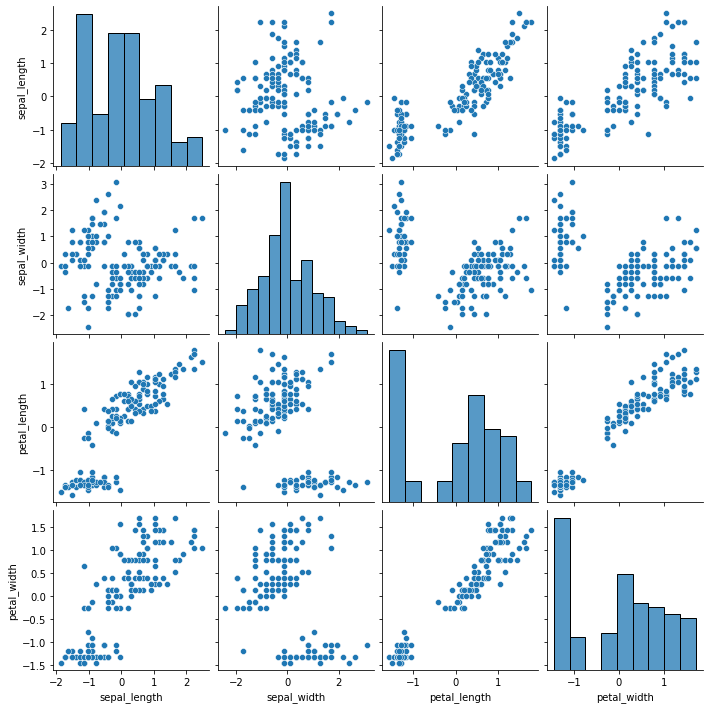

In [142]:
sns.pairplot(X_scaled)

## Step3: `Calculate the eigenvalues and eigenvectors.`

In [143]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [144]:
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Eigen values: 
 [2.93808505 0.9201649  0.14774182 0.02085386]


In [145]:
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [72.96244541329989, 22.850761786701757, 3.668921889282867, 0.5178709107154891]
Cummulative Variance Explained:  [ 72.96244541  95.8132072   99.48212909 100.        ]


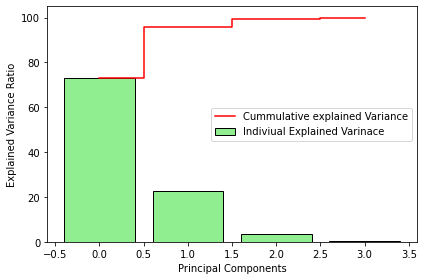

In [146]:
plt.bar(range(4),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(4), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

## Interpretation.
- First three principal components explain 99% of the variance in the data. The first three PCA is shown below
- so, we can choose the optimal number of principal components as 3.

In [147]:
y = df.target
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [148]:
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Splitting the dataset:

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Scaling the dataset:

In [150]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

In [151]:
X_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,-1.473937,1.203658,-1.562535,-1.312603
1,-0.133071,2.992376,-1.276006,-1.045633


In [152]:
X_test.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,0.354517,-0.585060,0.557775,0.022248
1,-0.133071,1.650837,-1.161395,-1.179118


## Decision Tree Classifier Before Applying PCA:

In [153]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [160]:
y_pred_DT = model.predict(X_test)
y_pred_train_DT = model.predict(X_train)
cm_DT= confusion_matrix(y_test, y_pred_DT)
cm_DT

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

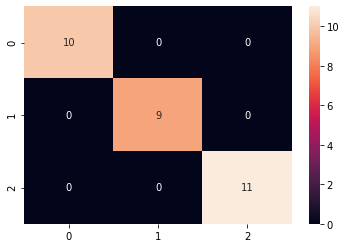

In [155]:
sns.heatmap(cm_DT, annot=True)
plt.show()

In [156]:
classification=classification_report(y_test,y_pred_DT)
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [161]:
test_ac = accuracy_score(y_test, y_pred_DT)
print("Accuracy test Score:", test_ac)

Accuracy test Score: 1.0


In [162]:
train_ac = accuracy_score(y_train,y_pred_train_DT)
print('Accuracy train score: ',train_ac)

Accuracy train score:  1.0


## Desicion Tree Classifier after applying PCA.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [165]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [166]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.92598348, 0.05371332, 0.015662  , 0.0046412 ])

In [168]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(X_train_2,y_train)

DecisionTreeClassifier()

In [169]:
y_pred_DT_2 = model2.predict(X_test_2)

In [170]:
from sklearn.metrics import confusion_matrix
cm_PCA= confusion_matrix(y_test, y_pred_DT_2)

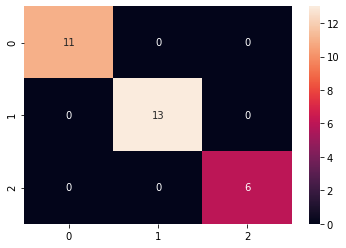

In [171]:
sns.heatmap(cm_PCA, annot=True)
plt.show()

In [172]:
ac_PCA = accuracy_score(y_test, y_pred_DT_2)
print("Accuracy Score:", ac_PCA)

Accuracy Score: 1.0


In [173]:
classification_2=classification_report(y_test,y_pred_DT_2)
print(classification_2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Pros :-
- Remove Noise
- Can deal with large datasets

## Cons :-
- hard to interpret
- sample dependent
- linear